In [185]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [186]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')


In [187]:
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
X_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

unique_labels = np.unique(np.concatenate((y_train, y_test)))
num_classes = len(unique_labels)
print(f'Unique labels: {unique_labels}')
print(f'Number of classes: {num_classes}')

Unique labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of classes: 24


In [188]:
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

In [189]:
num_features = X_train.shape[1]
image_size = int(np.sqrt(num_features))
print(f'Inferred image size: {image_size}x{image_size}')

Inferred image size: 28x28


In [190]:
if image_size * image_size != num_features:
    raise ValueError("The number of features is not a perfect square, cannot reshape into square images.")


In [191]:
X_train = X_train.reshape(-1, image_size, image_size, 1)
X_test = X_test.reshape(-1, image_size, image_size, 1)

In [192]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [193]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [194]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [195]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [196]:
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

Epoch 1/4
858/858 [==============================] - 34s 39ms/step - loss: 0.8934 - accuracy: 0.7386 - val_loss: 0.4211 - val_accuracy: 0.8482
Epoch 2/4
858/858 [==============================] - 36s 42ms/step - loss: 0.0428 - accuracy: 0.9924 - val_loss: 0.3421 - val_accuracy: 0.9002
Epoch 3/4
858/858 [==============================] - 35s 41ms/step - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.3974 - val_accuracy: 0.8989
Epoch 4/4
858/858 [==============================] - 32s 37ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.3807 - val_accuracy: 0.9136


In [197]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

225/225 [==============================] - 2s 9ms/step - loss: 0.3807 - accuracy: 0.9136
Test accuracy: 0.9135527014732361


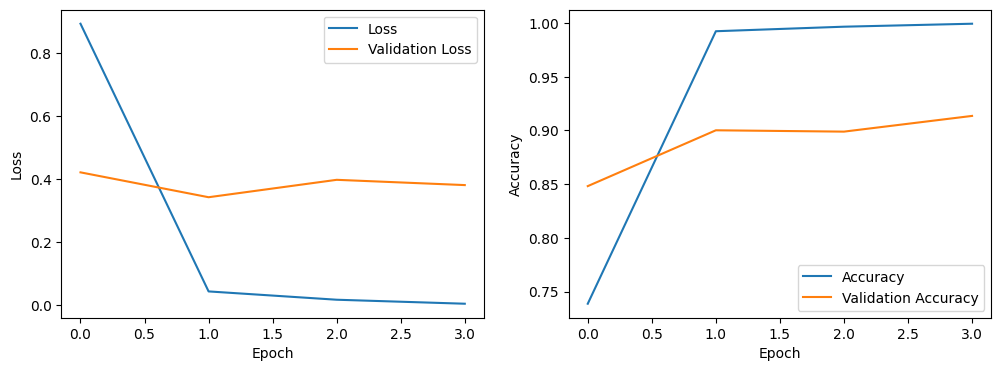

In [198]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [258]:
def visualize_predictions(X, y_true, y_pred, num_samples=5):
    indices = np.random.choice(range(len(X)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[idx].reshape(image_size, image_size), cmap='gray')
        plt.title(f'True: {np.argmax(y_true[idx])}\nPred: {np.argmax(y_pred[idx])}')
        plt.axis('off')
    plt.show()

225/225 [==============================] - 2s 9ms/step


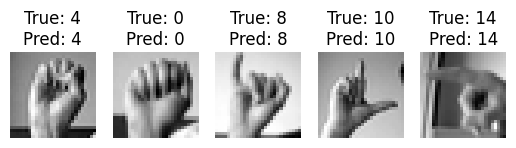

In [259]:
y_pred = model.predict(X_test)
visualize_predictions(X_test, y_test, y_pred)

In [323]:
import cv2

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to open.")
    image = cv2.resize(image, (image_size, image_size))
    image = image.reshape(1, image_size, image_size, 1)
    image = image / 255.0
    return image

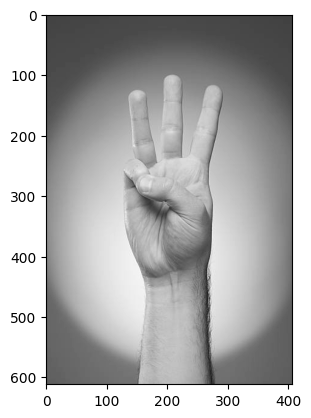

1/1 [==============================] - 0s 115ms/step
Predicted label: W


In [322]:
test_image_path = 'w1.jpg'
plt.imshow(cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.show()
predicted_label, prediction = predict_single_image(test_image_path)
print(f'Predicted label: {predicted_label}')

In [206]:
def visualize_single_prediction(image_path):
    image = preprocess_image(image_path).reshape(image_size, image_size)
    predicted_alphabet, _ = predict_single_image(image_path)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted_alphabet}')
    plt.axis('off')
    plt.show()

In [207]:
def visualize_single_prediction(image_path):
    image = preprocess_image(image_path).reshape(image_size, image_size)
    predicted_alphabet, _ = predict_single_image(image_path)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted_alphabet}')
    plt.axis('off')
    plt.show()


In [307]:
label_mapping = {
    21: 'W',
    4: 'E',
    20: 'L',
    8: 'C',
    5: 'O',
    18: 'M'
}


In [308]:
def predict_single_image(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    if predicted_label in label_mapping:
        predicted_alphabet = label_mapping[predicted_label]
    else:
        predicted_alphabet = 'Unknown'

    return predicted_alphabet, prediction



In [311]:
def predict_and_visualize_images(image_paths):
    predicted_word = []

    plt.figure(figsize=(15, 6))
    num_images = len(image_paths)

    for i, image_path in enumerate(image_paths):
        plt.subplot(1, num_images, i+1)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        predicted_alphabet, _ = predict_single_image(image_path)
        plt.title(f'Predicted: {predicted_alphabet}')

        predicted_word.append(predicted_alphabet)

    plt.tight_layout()
    plt.show()

    return ''.join(predicted_word)


1/1 [==============================] - 0s 91ms/step


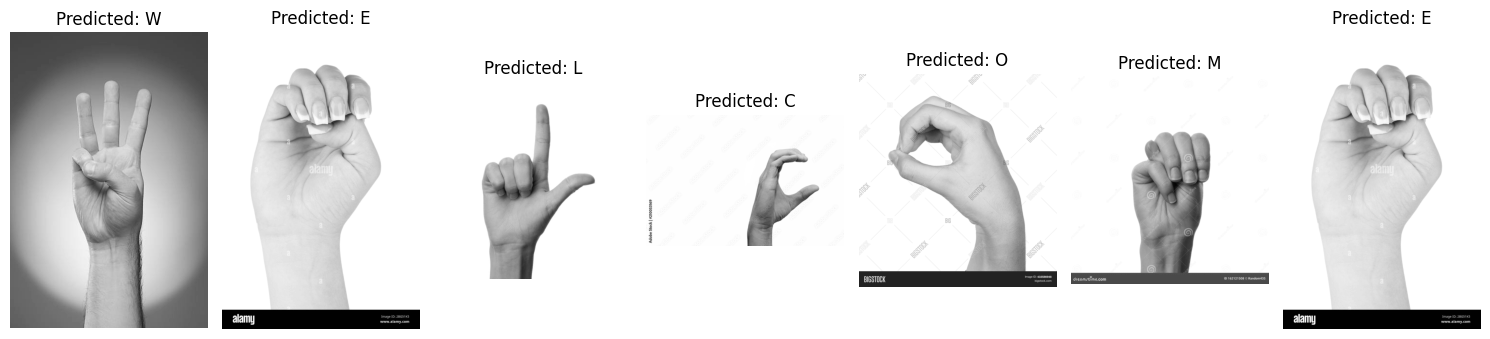

Predicted word: WELCOME


In [312]:
image_paths = ['w1.jpg', 'E3.jpg', 'L.jpg', 'c.jpg', 'o2.jpg', 'm.jpeg', 'E3.jpg']
predicted_word = predict_and_visualize_images(image_paths)
print(f'Predicted word: {predicted_word}')


In [313]:
pip install pyttsx3

In [317]:
!pip install gtts

In [318]:
from gtts import gTTS
from IPython.display import Audio

# Function to convert text to speech using gTTS
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    return filename

In [319]:
audio_file = text_to_speech(predicted_word)

In [320]:
from google.colab import files

files.download(audio_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>